### What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

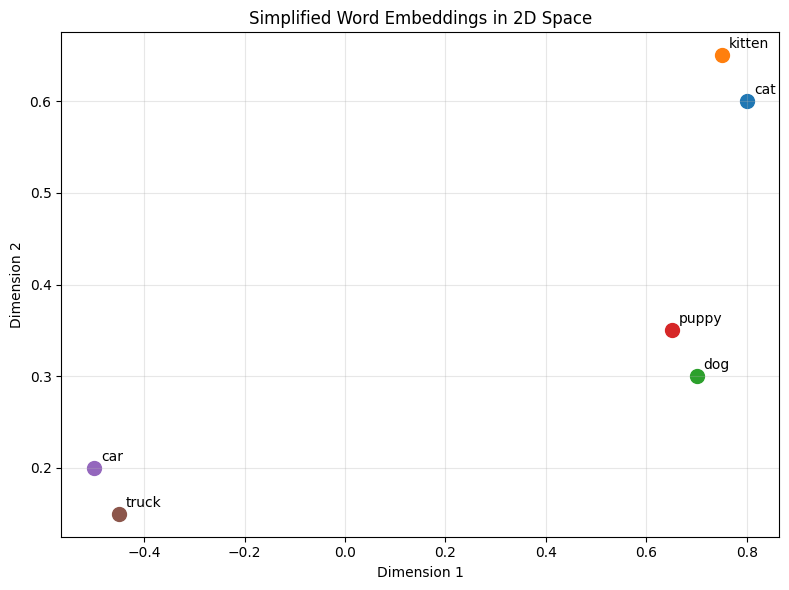

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)

In [6]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


In [7]:
cat_car_similarity=cosine_similarity(car_vector,cat_vector)
print(cat_car_similarity)

-0.43718588548916804


## Creating HuggingFace embeddings

In [9]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

/Users/abdullah/Repositories/learning/rag-and-agentic-ai/udemy-rag-course/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [10]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)

Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.018163258209824562, -0.09955164045095444, 0.013816130347549915, -0.008125921711325645, 0.014152209274470806, 0.0640648603439331, -0.006253346800804138, -0.0030179237946867943, 0.02528727613389492, -0.02019863948225975, 0.024329734966158867, 0.07435058057308197, 0.05117712542414665, 0.022038428112864494, -0.058306191116571426, 0.015268305316567421, 0.023584377020597458, 0.09455402195453644, -0.06508848816156387, 0.01329668890684843, -0.020497584715485573, -0.05690856650471687, 0.030303334817290306, -0.08365613222122192, 0.026596322655677795, -0.015231461264193058, -0.04361541196703911, 0.05398395657539368, 0.09025713801383972, -0.08893880993127823, 0.03964458778500557, -0.008835015818476677, -0.03034374862909317, 0.07425563782453537, -0.05409916490316391, 0.11107998341321945, 0.03689988702535629, -0.008959782309830189, -0.061402421444654465, -0.003143362235277891, 0.02195819467306137, 0.042208172380924225, -0.028937

In [11]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018348455429, -0.011870157904922962, -0.028116976842284203, 0.05123862624168396, -0.05597446486353874, 0.030191557481884956, 0.030161350965499878, 0.024698320776224136, -0.01837056875228882, 0.05876680091023445, -0.024953152984380722, 0.06015422195196152, 0.039831675589084625, 0.0332304984331131, -0.06131143495440483, -0.04937312379479408, -0.05486350134015083, -0.04007607698440552, 0.05642915889620781, 0.039156604558229446, -0.034737106412649155, -0.013247744180262089, 0.03196623548865318, -0.06349913775920868, -0.06017855554819107, 0.07823453098535538, -0.028303926810622215, -0.04744283854961395, 0.040359288454055786, -0.006630966439843178, -0.0667409673333168, -0.004191308747977018, -0.02531166560947895, 0.05334169417619705, 0.01742803305387497, -0.09792362153530121, 0.006061308551579714, -0.06524170190095901, 0.04557260125875473, 0.023641832172870636, 0.07658477872610092, -0.010264338925480843, -0.0040767318569123745, -0.06232280284166336, 0.03370519354939461, 0.018661150708

In [12]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

